In [174]:
import pandas as pd
import os
import json
import urllib.request
import zipfile
import urllib
from datetime import date
from ingest_functions4 import read_all_json_files
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'scipy'

In [110]:
url = 'https://www.gstatic.com/covid19/mobility/Region_Mobility_Report_CSVs.zip'
urllib.request.urlretrieve(url, '/Users/dwornikdrake/dev/airflow/includes/airflow_project/working files/mobility.zip')

('/Users/dwornikdrake/dev/airflow/includes/airflow_project/working files/mobility.zip',
 <http.client.HTTPMessage at 0x109157610>)

In [111]:
os.getcwd()

'/Users/dwornikdrake/dev/airflow/includes/airflow_project/working files'

In [112]:
with zipfile.ZipFile("/Users/dwornikdrake/dev/airflow/includes/airflow_project/working files/mobility.zip","r") as zip_ref:
    zip_ref.extractall("/Users/dwornikdrake/dev/airflow/includes/airflow_project/working files/extracted_zip")

In [113]:
filenames = os.listdir("/Users/dwornikdrake/dev/airflow/includes/airflow_project/working files/extracted_zip")
for filename in filenames:
    if filename.startswith("2020_US") or filename.startswith("2021_US"):
        pass
    else:
        os.remove(f"/Users/dwornikdrake/dev/airflow/includes/airflow_project/working files/extracted_zip/{filename}")

In [114]:
os.remove("/Users/dwornikdrake/dev/airflow/includes/airflow_project/working files/mobility.zip")

In [115]:
filename = '2020_US_Region_Mobility_Report.csv'
df = pd.read_csv(f"/Users/dwornikdrake/dev/airflow/includes/airflow_project/working files/extracted_zip/{filename}")

In [116]:
filename = '2021_US_Region_Mobility_Report.csv'
df2 = pd.read_csv(f"/Users/dwornikdrake/dev/airflow/includes/airflow_project/working files/extracted_zip/{filename}")

In [117]:
df3 = df.append(df2)

In [118]:
df3['date'] = pd.to_datetime(df3['date'])

In [119]:
df4 = df3[['country_region_code', 'sub_region_1', 'sub_region_2', 'census_fips_code', 'date', 'retail_and_recreation_percent_change_from_baseline', 'parks_percent_change_from_baseline', 'grocery_and_pharmacy_percent_change_from_baseline', 'transit_stations_percent_change_from_baseline', 'workplaces_percent_change_from_baseline', 'residential_percent_change_from_baseline']]

In [120]:
df4

,country_region_code,sub_region_1,sub_region_2,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,parks_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,US,NaN,NaN,NaN,2020-02-15,6.0,15.0,2.0,3.0,2.0,-1.0
1,US,NaN,NaN,NaN,2020-02-16,7.0,16.0,1.0,2.0,0.0,-1.0
2,US,NaN,NaN,NaN,2020-02-17,6.0,28.0,0.0,-9.0,-24.0,5.0
3,US,NaN,NaN,NaN,2020-02-18,0.0,6.0,-1.0,1.0,0.0,1.0
4,US,NaN,NaN,NaN,2020-02-19,2.0,8.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
875937,US,Wyoming,Weston County,56045.0,2021-11-26,NaN,NaN,NaN,NaN,-57.0,NaN
875938,US,Wyoming,Weston County,56045.0,2021-11-29,NaN,NaN,NaN,NaN,-23.0,NaN
875939,US,Wyoming,Weston County,56045.0,2021-11-30,NaN,NaN,NaN,NaN,-19.0,NaN
875940,US,Wyoming,Weston County,56045.0,2021-12-01,NaN,NaN,NaN,NaN,-23.0,NaN


In [121]:
ncc_mobility = df4[df4["census_fips_code"] == 10003]


In [122]:
dc_mobility = df4[df4["census_fips_code"] == 11001]

In [123]:
dc_mobility

,country_region_code,sub_region_1,sub_region_2,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,parks_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
84148,US,District of Columbia,NaN,11001.0,2020-02-15,-2.0,13.0,-2.0,-2.0,-2.0,-1.0
84149,US,District of Columbia,NaN,11001.0,2020-02-16,6.0,37.0,-1.0,3.0,0.0,-1.0
84150,US,District of Columbia,NaN,11001.0,2020-02-17,-10.0,21.0,-12.0,-39.0,-52.0,11.0
84151,US,District of Columbia,NaN,11001.0,2020-02-18,-5.0,13.0,-2.0,-3.0,-5.0,1.0
84152,US,District of Columbia,NaN,11001.0,2020-02-19,-2.0,7.0,-3.0,-3.0,-5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
90753,US,District of Columbia,NaN,11001.0,2021-11-28,-37.0,-13.0,-25.0,-44.0,-18.0,3.0
90754,US,District of Columbia,NaN,11001.0,2021-11-29,-41.0,-29.0,-20.0,-55.0,-43.0,13.0
90755,US,District of Columbia,NaN,11001.0,2021-11-30,-36.0,-25.0,-16.0,-56.0,-43.0,12.0
90756,US,District of Columbia,NaN,11001.0,2021-12-01,-32.0,-21.0,-13.0,-53.0,-42.0,11.0


# weather data

## NCC
### year 1

In [124]:
starting_offset = 1
params = {"datasetid": "GHCND", "locationid": "FIPS:10003", "startdate": "2020-02-15", "enddate": "2021-02-14"}
base_url = f"https://www.ncdc.noaa.gov/cdo-web/api/v2/data"
headers = {"Accept": "*/*", "Accept-Encoding": "gzip, deflate, br", "Connection": "keep-alive",
       "token": "oebeUQMqFfjWpaiLWLxheFizGqkQDhOw", "Content": "application/json"}

In [125]:
def parse_params(params) -> str:
    parsed_params = ""
    separator = "?"
    for key, value in params.items():
        parsed_params += separator
        parsed_params += f"{key}={value}"
        separator = "&"
    return parsed_params

In [126]:
def get_data_once(base_url, params, headers,  limit=1000, offset=1):
    url = f"{base_url}{parse_params(params)}&limit={limit}&offset={offset}"
    print(url)
    request = urllib.request.Request(url, headers=headers)
    response = urllib.request.urlopen(request)
    json_data = json.loads(response.read())
    if json_data != {}:
        return json_data['results']
    else:
        return {}

In [127]:
def get_all_data(base_url, params, headers, limit=1000,filename="json_"):
    offset = 1
    data_exists = True
    file_no = 0
    while data_exists:
        json_data = get_data_once(base_url, params, headers, limit, offset)
        if json_data != {}:
            with open(f"/Users/dwornikdrake/dev/airflow/includes/airflow_project/working files/{filename}{file_no:02d}.json", "w") as file:
                json.dump(json_data, file)
            offset += 1000
            file_no += 1
        else:
            data_exists = False
get_all_data(base_url, params, headers, filename="2020_json_ncc_")
# get_all_data(base_url, params, headers)

https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&locationid=FIPS:10003&startdate=2020-02-15&enddate=2021-02-14&limit=1000&offset=1
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&locationid=FIPS:10003&startdate=2020-02-15&enddate=2021-02-14&limit=1000&offset=1001
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&locationid=FIPS:10003&startdate=2020-02-15&enddate=2021-02-14&limit=1000&offset=2001
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&locationid=FIPS:10003&startdate=2020-02-15&enddate=2021-02-14&limit=1000&offset=3001
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&locationid=FIPS:10003&startdate=2020-02-15&enddate=2021-02-14&limit=1000&offset=4001
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&locationid=FIPS:10003&startdate=2020-02-15&enddate=2021-02-14&limit=1000&offset=5001
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&locationid=FIPS:10003&startdate=2020-02-15&enddate=2021-02-

### Year 2

In [128]:
today = date.today()
end = today.strftime("%Y-%m-%d")
params = {"datasetid": "GHCND", "locationid": "FIPS:10003", "startdate": "2021-02-15", "enddate": end}

In [129]:
get_all_data(base_url, params, headers,filename="2021_json_ncc_")

https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&locationid=FIPS:10003&startdate=2021-02-15&enddate=2021-12-06&limit=1000&offset=1
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&locationid=FIPS:10003&startdate=2021-02-15&enddate=2021-12-06&limit=1000&offset=1001
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&locationid=FIPS:10003&startdate=2021-02-15&enddate=2021-12-06&limit=1000&offset=2001
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&locationid=FIPS:10003&startdate=2021-02-15&enddate=2021-12-06&limit=1000&offset=3001
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&locationid=FIPS:10003&startdate=2021-02-15&enddate=2021-12-06&limit=1000&offset=4001
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&locationid=FIPS:10003&startdate=2021-02-15&enddate=2021-12-06&limit=1000&offset=5001
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&locationid=FIPS:10003&startdate=2021-02-15&enddate=2021-12-

## DC weather
### year 1

In [130]:
params = {"datasetid": "GHCND", "locationid": "FIPS:11001", "startdate": "2020-02-15", "enddate": "2021-02-14"}

In [131]:
get_all_data(base_url, params, headers,filename="2020_json_dc_")

https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&locationid=FIPS:11001&startdate=2020-02-15&enddate=2021-02-14&limit=1000&offset=1
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&locationid=FIPS:11001&startdate=2020-02-15&enddate=2021-02-14&limit=1000&offset=1001
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&locationid=FIPS:11001&startdate=2020-02-15&enddate=2021-02-14&limit=1000&offset=2001
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&locationid=FIPS:11001&startdate=2020-02-15&enddate=2021-02-14&limit=1000&offset=3001
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&locationid=FIPS:11001&startdate=2020-02-15&enddate=2021-02-14&limit=1000&offset=4001
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&locationid=FIPS:11001&startdate=2020-02-15&enddate=2021-02-14&limit=1000&offset=5001
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&locationid=FIPS:11001&startdate=2020-02-15&enddate=2021-02-

In [132]:
today = date.today()
end = today.strftime("%Y-%m-%d")
params = {"datasetid": "GHCND", "locationid": "FIPS:11001", "startdate": "2021-02-15", "enddate": end}
get_all_data(base_url, params, headers,filename="2021_json_dc_")

https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&locationid=FIPS:11001&startdate=2021-02-15&enddate=2021-12-06&limit=1000&offset=1
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&locationid=FIPS:11001&startdate=2021-02-15&enddate=2021-12-06&limit=1000&offset=1001
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&locationid=FIPS:11001&startdate=2021-02-15&enddate=2021-12-06&limit=1000&offset=2001
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&locationid=FIPS:11001&startdate=2021-02-15&enddate=2021-12-06&limit=1000&offset=3001
https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&locationid=FIPS:11001&startdate=2021-02-15&enddate=2021-12-06&limit=1000&offset=4001


In [133]:
dc_weather = pd.DataFrame(read_all_json_files("/Users/dwornikdrake/dev/airflow/includes/airflow_project/working files","_dc_"))

In [134]:
dc_weather['date'] = pd.to_datetime(dc_weather['date'])


In [135]:
ncc_weather = pd.DataFrame(read_all_json_files("/Users/dwornikdrake/dev/airflow/includes/airflow_project/working files","_ncc_"))

In [136]:
ncc_weather['date'] = pd.to_datetime(ncc_weather['date'])
ncc_weather

,date,datatype,station,attributes,value
0,2020-02-15,PRCP,GHCND:US1DENC0001,",,N,",0
1,2020-02-15,PRCP,GHCND:US1DENC0002,",,N,",0
2,2020-02-15,SNOW,GHCND:US1DENC0002,",,N,",0
3,2020-02-15,SNWD,GHCND:US1DENC0002,",,N,",0
4,2020-02-15,WESD,GHCND:US1DENC0002,",,N,",0
...,...,...,...,...,...
28757,2021-12-04,SNOW,GHCND:US1DENC0035,",,N,",0
28758,2021-12-04,PRCP,GHCND:US1DENC0040,",,N,",0
28759,2021-12-04,SNOW,GHCND:US1DENC0040,",,N,",0
28760,2021-12-04,PRCP,GHCND:US1DENC0067,",,N,",0


In [137]:
snow_dc = dc_weather.loc[dc_weather["datatype"] == "SNOW"][["date", "value"]]
snow_dc

,date,value
1,2020-02-15,0
3,2020-02-15,0
9,2020-02-15,0
15,2020-02-16,0
17,2020-02-16,0
...,...,...
9384,2021-11-30,0
9386,2021-12-01,0
9388,2021-12-01,0
9391,2021-12-01,0


In [138]:
percip_dc = dc_weather.loc[dc_weather["datatype"] == "PRCP"][["date", "value"]]

percip_dc

,date,value
0,2020-02-15,0
2,2020-02-15,0
8,2020-02-15,0
14,2020-02-16,0
16,2020-02-16,0
...,...,...
9394,2021-12-02,5
9395,2021-12-02,5
9396,2021-12-03,0
9397,2021-12-03,0


In [139]:
percip_ncc = ncc_weather.loc[ncc_weather["datatype"] == "PRCP"][["date", "value"]]

percip_ncc

,date,value
0,2020-02-15,0
1,2020-02-15,0
6,2020-02-15,0
8,2020-02-15,0
10,2020-02-15,0
...,...,...
28752,2021-12-04,0
28754,2021-12-04,0
28756,2021-12-04,0
28758,2021-12-04,0


In [140]:
snow_ncc = ncc_weather.loc[ncc_weather["datatype"] == "SNOW"][["date", "value"]]
snow_ncc

,date,value
2,2020-02-15,0
7,2020-02-15,0
9,2020-02-15,0
11,2020-02-15,0
13,2020-02-15,0
...,...,...
28753,2021-12-04,0
28755,2021-12-04,0
28757,2021-12-04,0
28759,2021-12-04,0


In [141]:
snow_ncc['date'] = pd.to_datetime(snow_ncc['date'])

In [142]:
snow_ncc

,date,value
2,2020-02-15,0
7,2020-02-15,0
9,2020-02-15,0
11,2020-02-15,0
13,2020-02-15,0
...,...,...
28753,2021-12-04,0
28755,2021-12-04,0
28757,2021-12-04,0
28759,2021-12-04,0


In [147]:
weekly_percip_dc = percip_dc.groupby(percip_dc['date'].dt.strftime('%Y-week %W'))['value'].mean()

In [223]:
weekly_snow_dc = snow_dc.groupby(snow_dc['date'].dt.strftime('%Y-week %W'))['value'].mean()
weekly_snow_dc

date
2020-week 06    0.0
2020-week 07    0.0
2020-week 08    0.0
2020-week 09    0.0
2020-week 10    0.0
               ... 
2021-week 44    0.0
2021-week 45    0.0
2021-week 46    0.0
2021-week 47    0.0
2021-week 48    0.0
Name: value, Length: 96, dtype: float64

In [149]:
weekly_mobility_dc = dc_mobility.groupby(dc_mobility['date'].dt.strftime('%Y-week %W')).mean()

In [151]:
weekly_percip_ncc = percip_ncc.groupby(percip_ncc['date'].dt.strftime('%Y-week %W'))['value'].mean()

In [224]:
weekly_snow_ncc = snow_ncc.groupby(snow_ncc['date'].dt.strftime('%Y-week %W'))['value'].mean()
weekly_snow_ncc

date
2020-week 06    0.0
2020-week 07    0.0
2020-week 08    0.0
2020-week 09    0.0
2020-week 10    0.0
               ... 
2021-week 44    0.0
2021-week 45    0.0
2021-week 46    0.0
2021-week 47    0.0
2021-week 48    0.0
Name: value, Length: 96, dtype: float64

In [182]:
weekly_mobility_ncc = ncc_mobility.groupby(ncc_mobility['date'].dt.strftime('%Y-week %W')).mean()
weekly_mobility_ncc

,census_fips_code,retail_and_recreation_percent_change_from_baseline,parks_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
date,,,,,,,
2020-week 06,10003.0,3.000000,12.500000,0.500000,12.500000,1.500000,-0.500000
2020-week 07,10003.0,3.571429,25.571429,1.714286,7.714286,-1.714286,0.142857
2020-week 08,10003.0,5.428571,4.285714,3.000000,3.000000,2.857143,-0.857143
2020-week 09,10003.0,6.857143,31.857143,5.857143,7.714286,2.285714,-0.857143
2020-week 10,10003.0,2.428571,40.714286,10.142857,-3.714286,-2.428571,1.428571
...,...,...,...,...,...,...,...
2021-week 44,10003.0,-2.571429,2.571429,3.428571,-25.857143,-22.857143,5.285714
2021-week 45,10003.0,-3.000000,-0.714286,2.428571,-30.285714,-25.428571,6.000000
2021-week 46,10003.0,-2.714286,-10.571429,3.857143,-29.000000,-21.571429,5.000000


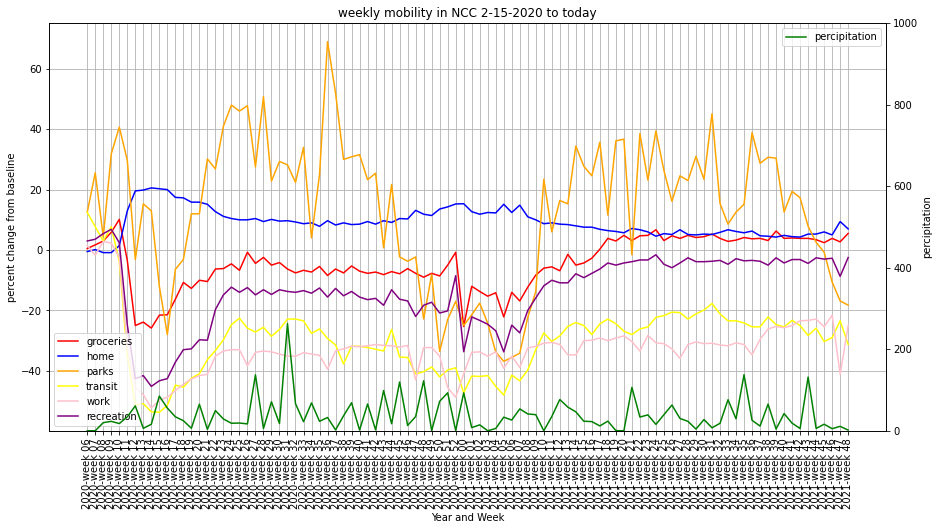

In [243]:
x = weekly_mobility_ncc.index
fig, ax = plt.subplots()
plt.xticks(rotation = 90)
ax2=ax.twinx()
fig.set_size_inches(15, 7.5)

ax.plot(x, weekly_mobility_ncc['grocery_and_pharmacy_percent_change_from_baseline'], color='red',label="groceries")
ax.plot(x, weekly_mobility_ncc['residential_percent_change_from_baseline'], color='blue', label="home")
ax.plot(x, weekly_mobility_ncc['parks_percent_change_from_baseline'], color='orange', label="parks")
ax.plot(x, weekly_mobility_ncc['transit_stations_percent_change_from_baseline'], color='yellow', label="transit")
ax.plot(x, weekly_mobility_ncc['workplaces_percent_change_from_baseline'], color='pink', label="work")
ax.plot(x, weekly_mobility_ncc['retail_and_recreation_percent_change_from_baseline'], color='purple', label="recreation")
ax2.plot(x, weekly_percip_ncc, color="green", label="percipitation")
ax.grid()
ax.legend(loc="lower left")
ax.set(xlabel='Year and Week', ylabel='percent change from baseline', title='weekly mobility in NCC 2-15-2020 to today')
ax2.set(ylabel="percipitation",ylim=[0,1000])
ax2.legend()


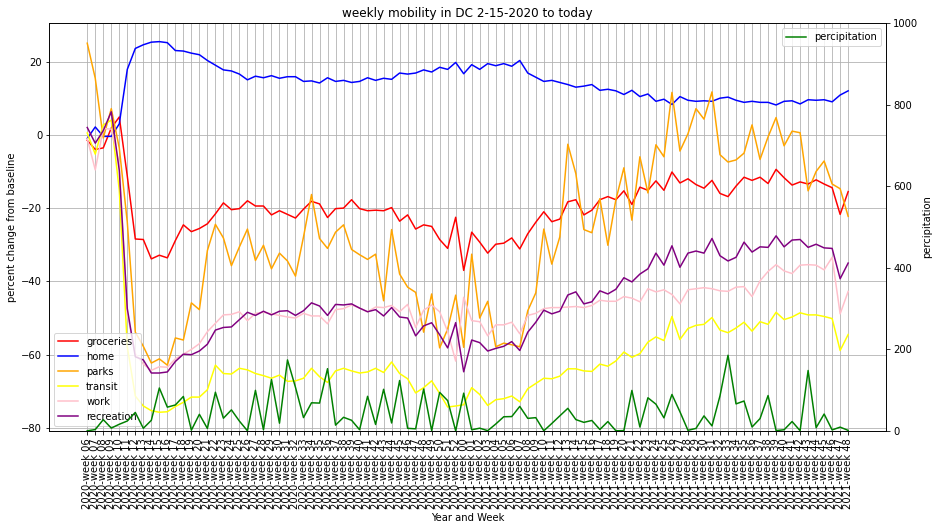

In [244]:
x = weekly_mobility_dc.index
fig, ax = plt.subplots()
plt.xticks(rotation = 90)
ax2=ax.twinx()
fig.set_size_inches(15, 7.5)

ax.plot(x, weekly_mobility_dc['grocery_and_pharmacy_percent_change_from_baseline'], color='red',label="groceries")
ax.plot(x, weekly_mobility_dc['residential_percent_change_from_baseline'], color='blue', label="home")
ax.plot(x, weekly_mobility_dc['parks_percent_change_from_baseline'], color='orange', label="parks")
ax.plot(x, weekly_mobility_dc['transit_stations_percent_change_from_baseline'], color='yellow', label="transit")
ax.plot(x, weekly_mobility_dc['workplaces_percent_change_from_baseline'], color='pink', label="work")
ax.plot(x, weekly_mobility_dc['retail_and_recreation_percent_change_from_baseline'], color='purple', label="recreation")
ax2.plot(x, weekly_percip_dc, color="green", label="percipitation")
ax.grid()
ax.legend(loc="lower left")
ax.set(xlabel='Year and Week', ylabel='percent change from baseline', title='weekly mobility in DC 2-15-2020 to today')
ax2.set(ylabel="percipitation",ylim=[0,1000])
ax2.legend()

[Text(0.5, 0, 'Year and Week'),
 Text(0, 0.5, 'percent change from baseline'),
 Text(0.5, 1.0, 'weekly mobility change, DC and NCC')]

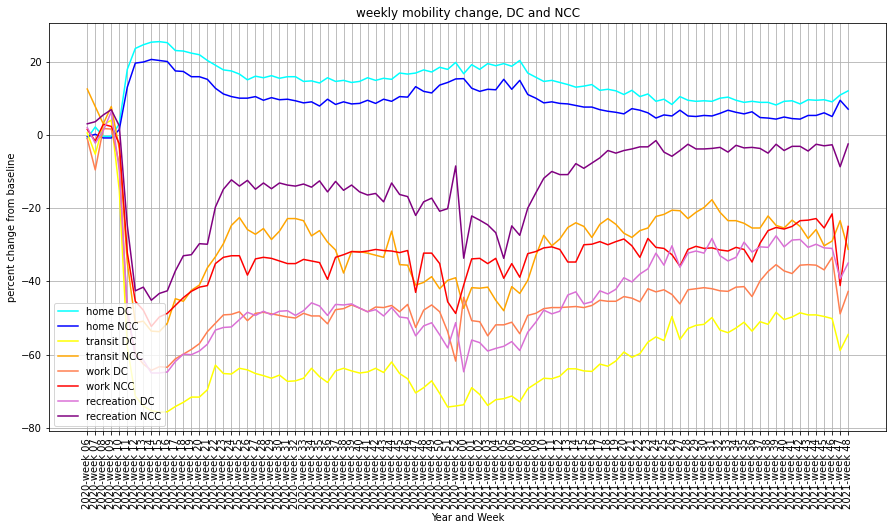

In [248]:
x = weekly_mobility_dc.index
fig, ax = plt.subplots()
fig.set_size_inches(15, 7.5)
plt.xticks(rotation = 90)
ax.plot(x, weekly_mobility_dc['residential_percent_change_from_baseline'], color='cyan', label="home DC")
ax.plot(x, weekly_mobility_ncc['residential_percent_change_from_baseline'], color='blue', label="home NCC")
ax.plot(x, weekly_mobility_dc['transit_stations_percent_change_from_baseline'], color='yellow', label="transit DC")
ax.plot(x, weekly_mobility_ncc['transit_stations_percent_change_from_baseline'], color='orange', label="transit NCC")
ax.plot(x, weekly_mobility_dc['workplaces_percent_change_from_baseline'], color='coral', label="work DC")
ax.plot(x, weekly_mobility_ncc['workplaces_percent_change_from_baseline'], color='red', label="work NCC")
ax.plot(x, weekly_mobility_dc['retail_and_recreation_percent_change_from_baseline'], color='orchid', label="recreation DC")
ax.plot(x, weekly_mobility_ncc['retail_and_recreation_percent_change_from_baseline'], color='purple', label="recreation NCC")
ax.grid()
ax.legend(loc="lower left")
ax.set(xlabel='Year and Week', ylabel='percent change from baseline', title='weekly mobility change, DC and NCC')

[Text(0.5, 0, 'Year and Week'),
 Text(0, 0.5, 'DC change - NCC change'),
 Text(0.5, 1.0, 'weekly mobility change, DC and NCC')]

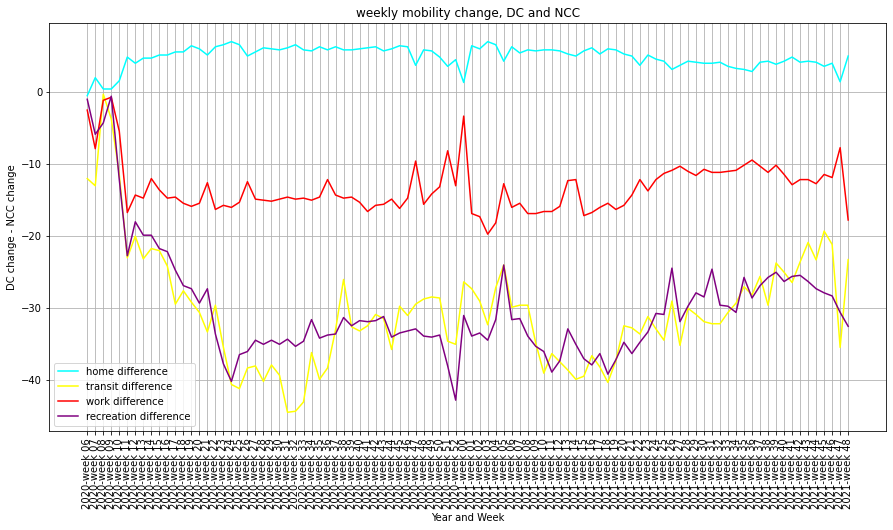

In [252]:
x = weekly_mobility_dc.index
fig, ax = plt.subplots()
fig.set_size_inches(15, 7.5)
plt.xticks(rotation = 90)
ax.plot(x, weekly_mobility_dc['residential_percent_change_from_baseline'] - weekly_mobility_ncc['residential_percent_change_from_baseline'], color='cyan', label="home difference")
ax.plot(x, weekly_mobility_dc['transit_stations_percent_change_from_baseline'] -  weekly_mobility_ncc['transit_stations_percent_change_from_baseline'], color='yellow', label="transit difference")
ax.plot(x, weekly_mobility_dc['workplaces_percent_change_from_baseline'] - weekly_mobility_ncc['workplaces_percent_change_from_baseline'], color='red', label="work difference")
ax.plot(x, weekly_mobility_dc['retail_and_recreation_percent_change_from_baseline'] - weekly_mobility_ncc['retail_and_recreation_percent_change_from_baseline'], color='purple', label="recreation difference")
ax.grid()
ax.legend(loc="lower left")
ax.set(xlabel='Year and Week', ylabel='DC change - NCC change', title='weekly mobility change, DC and NCC')